In [1]:
##########################################################################
# Created on Sat Otc 30 14:42:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

In [2]:
#import sys
#!conda install --yes --prefix {sys.prefix} -c anaconda scipy

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libgfortran-ng-7.3.0       |       hdf63c60_0         1.3 MB  anaconda
    scipy-1.5.2                |   py36h0b6359f_0        18.5 MB  anaconda
    ------------------------------------------------------------
                                           Total:        19.8 MB

The following NEW packages will be INSTALLED:

  libgfortran-ng     anaconda/linux-64::libgfortran-ng-7.3.0-hdf63c60_0
  scipy              anaconda/linux-64::scipy-1.5.2-py36h0b6359f_0



libgfortran-ng-7.3.0 |

In [3]:
import scipy
scipy.__version__

'1.5.2'

# 5.1.1.Integrate

#### PDF of standard normal distribution
$f(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}$

#### Probability that the variable x is in the interval [a, b]
$\int_{a}^{b} f(x)dx = \int_{a}^{b}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}dx$

In [11]:
import scipy.integrate as sci
import numpy as np

def f(x):
    equation=np.exp(-0.5*x**2)/pow(2*np.pi,0.5)
    return equation

In [13]:
sci.quad(func=f,a=-2.0,b=2.0) #Adaptive integral

(0.9544997361036417, 1.8403548653972355e-11)

In [14]:
sci.fixed_quad(func=f,a=-2.0,b=2.0) #Fixed Gauss integral

(0.9547606259052617, None)

In [15]:
sci.quadrature(func=f,a=-2.0,b=2.0) #Adaptive Gauss integral

(0.954499735843967, 5.476700204454232e-09)

In [16]:
sci.romberg(function=f,a=-2.0,b=2.0) #Adaptive Romberg integral

0.9544997361036476

# 5.1.2.Interpolate

#### Spot yield of treasury bonds

Tenor/Year | Spot Yield 
:-----: | :----: 
0.25 | 1.1032% 
0.5  | 1.2465%
0.75 | 1.3460%
1   | 1.3328%
2   | 1.6431%
3   | 1.6716%
5   | 2.1576%

nearest 4y treasury bonds yield 0.016716
zero 4y treasury bonds yield 0.016716
slinear 4y treasury bonds yield 0.019146000000000003
quadratic 4y treasury bonds yield 0.018095917912822147
cubic 4y treasury bonds yield 0.016151964941569282


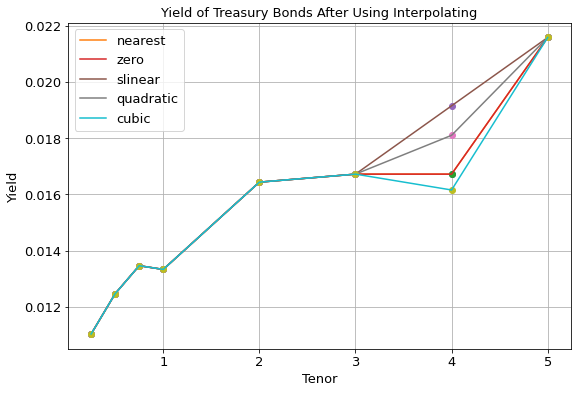

In [18]:
from scipy import interpolate
import matplotlib.pyplot as plt

rates=np.array([0.011032,0.012465,0.013460,0.013328,0.016431,0.016716,0.021576])
t=np.array([0.25,0.5,0.75,1.0,2.0,3.0,5.0])
t_new=np.array([0.25,0.5,0.75,1.0,2.0,3.0,4.0,5.0])

types=["nearest","zero","slinear","quadratic","cubic"]

plt.figure(figsize=(9,6))
for i in types:
    f=interpolate.interp1d(x=t,y=rates,kind=i)
    rates_new=f(t_new)
    print(i,'4y treasury bonds yield',rates_new[-2])
    plt.plot(t_new,rates_new,'o')
    plt.plot(t_new,rates_new,'-',label=i)
    plt.xticks(fontsize=13)
    plt.xlabel('Tenor',fontsize=13)
    plt.yticks(fontsize=13)
    plt.ylabel('Yield',fontsize=13)
    plt.legend(loc=0,fontsize=13)
    plt.grid()
plt.title('Yield of Treasury Bonds After Using Interpolating',fontsize=13)
plt.show()

# 5.1.3.Solving equations

#### Stock and Portofolio Return

Date      | CAST    | CSS | BOC | SAIC | Portfolio Return
:------:  | :----:  | :----: | :----: | :----: | :----:
2020-05-25   | -3.5099% | -1.3892% | 0.5848%  | 2.1242% | 0.191555%
2020-05-26   | 1.7230%  | 2.4334% | -0.2907% | 0.2133% | 0.757775%
2020-05-27   | -0.3450% | -3.3758% | 0.5831%  | -2.9803% | -1.773255%
2020-05-28   | -2.4551% | 1.4622% | 0.5797%  | -0.2743% | -0.040620%

#### Calculate weight of stock 

$\begin{bmatrix}{-3.5099\%}&{-1.3892\%}&{0.5848\%}&{2.1242\%}\\
    {1.7230\%}&{2.4334\%}&{-0.2907\%}&{0.2133\%}\\
    {-0.3450\%}&{-3.3758\%}&{0.5831\%}&{-2.9803\%}\\
    {-2.4551\%}&{1.4622\%}&{0.5797\%}&{-0.2743\%}\end{bmatrix}  
\begin{bmatrix}w_{1}\\w_{2}\\w_{3}\\w_{4}\end{bmatrix} 
= \begin{bmatrix}{0.191555\%}\\{0.757775\%}\\{-1.773255\%}\\{-0.040620\%}\end{bmatrix}$

### 1.Using solve function

In [23]:
from scipy import linalg

R_stock=np.array([[-0.035099,0.017230,-0.003450,-0.024551],
                        [-0.013892,0.024334,-0.033758,0.014622],
                        [0.005848,-0.002907,0.005831,0.005797],
                        [0.021242,0.002133,-0.029803,-0.002743]]).T
print(R_stock)
R_portfolio=np.array([0.00191555,0.00757775,-0.01773255,-0.00040620])
name=np.array(['CAST','CSS','BOC','SAIC'])

weight=linalg.solve(a=R_stock,b=R_portfolio)
for i in range(len(name)):
    print(name[i],round(weight[i],4))

[[-0.035099 -0.013892  0.005848  0.021242]
 [ 0.01723   0.024334 -0.002907  0.002133]
 [-0.00345  -0.033758  0.005831 -0.029803]
 [-0.024551  0.014622  0.005797 -0.002743]]
CAST 0.15
CSS 0.2
BOC 0.25
SAIC 0.4


### 2.Using fsolve function

In [24]:
import scipy.optimize as sco

def g(w):
    w1,w2,w3,w4=w
    eq1=-0.035099*w1 -0.013892*w2  +0.005848*w3  +0.021242*w4 -0.00191555
    eq2=0.01723*w1 +0.024334*w2  -0.002907*w3  +0.002133*w4 -0.00757775
    eq3=-0.00345*w1 -0.033758*w2 +0.005831*w3  -0.029803*w4 +0.01773255
    eq4=-0.024551*w1 +0.014622*w2 +0.005797*w3  -0.002743*w4 +0.00040620
    return[eq1,eq2,eq3,eq4]

w0=[0.1,0.1,0.1,0.1] #initial weight
result=sco.fsolve(func=g,x0=w0)

for i in range(len(name)):
    print(name[i],round(result[i],4))

CAST 0.15
CSS 0.2
BOC 0.25
SAIC 0.4


# 5.1.4.Optimize

#### Stock Info 2020/12/31

Code     | Name      | Average Yearly Return(2019~2020) | Close Price(2020/12/31) | PE ratio 
:------: | :------:  | :----: | :----: | :----:
601398   | ICBC      | 5.4703% | 4.99  | 5.6961
601111   | Air China | 5.3580% | 7.49  | 16.9758
600900   | Yangtze Power | 21.6717% | 19.16  | 20.2258 
601607   | Shanghai Pharmaceutical | 4.9761% | 19.20  | 13.3713
601933   | Yonghui Supermarket | 8.6041%  | 7.18  | 43.6949

Initial capital is 100million \
Average PE can't be greater than 15 \
Can't short sale \
In order to maximum portfolio return, calculate weight of stock 


$$Target function: \max_{w_i}f(w_i)= \max_{w_i}(\sum\nolimits_{i=1}^{5} R_i w_i )$$

$Constraint: \\
  \sum\nolimits_{i=1}^{5} w_i=1\\
  \sum\nolimits_{i=1}^{5}  \gamma_i w_i \leq 15\\
  w_i  \geq 0$

In [25]:
R=np.array([0.054703,0.053580,0.216717,0.049761,0.086041])
P=np.array([4.99,7.49,19.16,19.20,7.18])
PE=np.array([5.6961,16.9758,20.2258,13.3713,43.6949])

In [26]:
def f(w):
    w=np.array(w)
    return -np.sum(R*w) #only minimize function in submodule optimize, when get maximum, need to add minus in front of target function

In [28]:
cons=({'type':'eq','fun':lambda w: np.sum(w)-1},{'type':'ineq','fun':lambda w: 15-np.sum(w*PE)})
bnds=((0,1),(0,1),(0,1),(0,1),(0,1))
w0=[0.25,0.25,0.25,0.25,0.25]
result=sco.minimize(fun=f,x0=w0,method='SLSQP',bounds=bnds,constraints=cons) #sequential Least squares programming
result

     fun: -0.15844650841821595
     jac: array([-0.054703, -0.05358 , -0.216717, -0.049761, -0.086041])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([3.59663310e-01, 1.42247325e-16, 6.40336690e-01, 3.46944695e-17,
       0.00000000e+00])

In [31]:
result['x'].round(4)

array([0.3597, 0.    , 0.6403, 0.    , 0.    ])

In [32]:
-f(result['x']).round(4) #max portfolio return

0.1584

In [33]:
fund=1e7
shares=fund*result['x']/P #shares amount
print('Shares of ICBC(Round down)',int(shares[0]))
print('Shares of Air China(Round down)',int(shares[1]))
print('Shares of Yangtze Power(Round down)',int(shares[2]))
print('Shares of Shanghai Pharmaceutical(Round down)',int(shares[3]))
print('Shares of Yonghui Supermarket(Round down)',int(shares[4]))

Shares of ICBC(Round down) 720768
Shares of Air China(Round down) 0
Shares of Yangtze Power(Round down) 334204
Shares of Shanghai Pharmaceutical(Round down) 0
Shares of Yonghui Supermarket(Round down) 0


In [35]:
#change the constraint of sum(PE*w)<=15 to <=20
cons_new=({'type':'eq','fun':lambda w: np.sum(w)-1},{'type':'ineq','fun':lambda w: 20-np.sum(w*PE)})
result_new=sco.minimize(fun=f,x0=w0,method='SLSQP',bounds=bnds,constraints=cons_new)
result_new['x'].round(4)
-f(result_new['x']).round(4)

0.2142

In [36]:
shares_new=fund*result_new['x']/P #shares amount
print('Shares of ICBC(Round down)',int(shares_new[0]))
print('Shares of Air China(Round down)',int(shares_new[1]))
print('Shares of Yangtze Power(Round down)',int(shares_new[2]))
print('Shares of Shanghai Pharmaceutical(Round down)',int(shares_new[3]))
print('Shares of Yonghui Supermarket(Round down)',int(shares_new[4]))

Shares of ICBC(Round down) 31143
Shares of Air China(Round down) 0
Shares of Yangtze Power(Round down) 513809
Shares of Shanghai Pharmaceutical(Round down) 0
Shares of Yonghui Supermarket(Round down) 0


# 5.1.5.Statistic

## 1.Descriptional statistic

In [40]:
import scipy.stats as st
import pandas as pd

index=pd.read_excel('SME_GEM daily(2018-2020).xlsx',engine='openpyxl',sheet_name="Sheet1",header=0,index_col=0)
index.describe()

,SME Index,GEM Index
count,730.000000,730.000000
mean,0.000454,0.000883
std,0.016304,0.017965
min,-0.086207,-0.079380
25%,-0.008929,-0.009473
50%,0.000252,0.000976
75%,0.009582,0.011471
max,0.052106,0.054983


In [41]:
st.describe(index)

DescribeResult(nobs=730, minmax=(array([-0.086207, -0.07938 ]), array([0.052106, 0.054983])), mean=array([0.00045371, 0.00088273]), variance=array([0.00026581, 0.00032275]), skewness=array([-0.4085689 , -0.30464443]), kurtosis=array([2.2975402, 1.4567604]))

In [43]:
st.kurtosis(index)

array([2.2975402, 1.4567604])

In [44]:
st.moment(index,moment=3)

array([-1.76696493e-06, -1.76281270e-06])

In [45]:
st.mode(index)

ModeResult(mode=array([[-0.02041 , -0.005323]]), count=array([[2, 2]]))

In [47]:
st.skew(index)

array([-0.4085689 , -0.30464443])

## 2.Probability analysis

In [48]:
I=100000
r_mean=0.04
r_std=0.01

rand_norm=st.norm.rvs(loc=r_mean,scale=r_std,size=I) #ramdom sampling

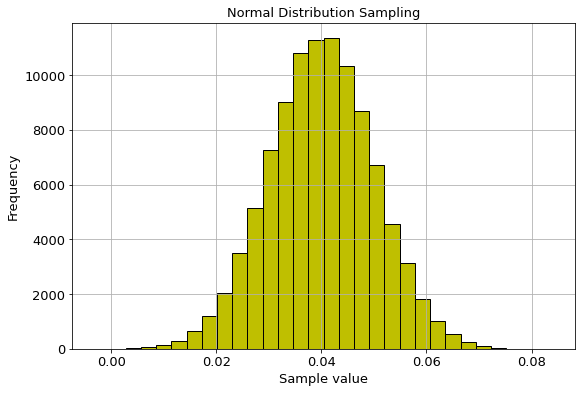

In [49]:
plt.figure(figsize=(9,6))
plt.hist(rand_norm,bins=30,facecolor='y',edgecolor='k')
plt.xticks(fontsize=13)
plt.xlabel('Sample value',fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.title('Normal Distribution Sampling',fontsize=13)
plt.grid()
plt.show()

In [51]:
# probability when r<3%
r1=0.03
prob=st.norm.cdf(x=r1,loc=r_mean,scale=r_std)
print('probability when r<3% is',round(prob,6))

probability when r<3% is 0.158655


In [52]:
r2=0.05
value_pdf=st.norm.pdf(x=r2,loc=r_mean,scale=r_std)
print('pdf when r=5% is',round(value_pdf,6))

pdf when r=5% is 24.197072


In [53]:
prob=0.9
value_ppf=st.norm.ppf(q=prob,loc=r_mean,scale=r_std) #ppf is inverse function of cdf
print('r when probability=90% is',round(value_ppf,6))

r when probability=90% is 0.052816


## 3.Statistical test

In [55]:
#Kolmogorov-Smirnov Test
#pvalue < 5% indicates reject H0:Normal distribution
st.kstest(rvs=index.iloc[:,0],cdf='norm',args=(0,0.017)) #SME index N~(0,0.017) test 

KstestResult(statistic=0.06557472211410709, pvalue=0.003578599840387124)

In [56]:
st.kstest(rvs=index.iloc[:,-1],cdf='norm',args=(0,0.017)) #GEM index N~(0,0.017) test 

KstestResult(statistic=0.051210519958520856, pvalue=0.04196299572232809)

In [57]:
#Anderson-Darling Test
st.anderson(x=index.iloc[:,0],dist='norm')

AndersonResult(statistic=2.8108208330825164, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [58]:
st.anderson(x=index.iloc[:,-1],dist='norm')

AndersonResult(statistic=2.589462384982653, critical_values=array([0.573, 0.652, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [59]:
#Shapiro-Wilk Test
st.shapiro(index.iloc[:,0])

ShapiroResult(statistic=0.9740028977394104, pvalue=4.213443483003232e-10)

In [60]:
st.shapiro(index.iloc[:,-1])

ShapiroResult(statistic=0.9800363779067993, pvalue=1.9954674357336444e-08)

In [61]:
#normaltest
st.normaltest(index,axis=0)

NormaltestResult(statistic=array([62.51131179, 36.75872221]), pvalue=array([2.66588319e-14, 1.04218517e-08]))